# SQL Project

The global outbreak of the coronavirus has had a profound effect on people's daily routines. With restrictions on outdoor activities and more time spent at home, individuals have turned to books as a source of entertainment and solace. This shift in behavior has sparked the interest of startups aiming to meet the growing demand for digital book services. In this context, a database containing information on books, publishers, authors, and customer ratings and reviews becomes a valuable resource for understanding this emerging market.


The primary objective of this study is to leverage the provided database to gain insights into the impact of the coronavirus on the book industry. By analyzing customer ratings, reviews, and other relevant data, the study aims to:

- Identify trends and patterns: Explore changes in reading preferences, popular genres, and emerging authors during the pandemic period.

- Understand customer behavior: Analyze how readers' habits and preferences have evolved due to the pandemic, including shifts in reading frequency, book formats, and preferred genres.

- Assess the competition: Evaluate the performance of competing book services and identify their strengths and weaknesses.

- Generate a value proposition: Utilize the database insights to develop a compelling value proposition for a new product or service that caters to the evolving needs of book enthusiasts during the pandemic.

## Data Diagram

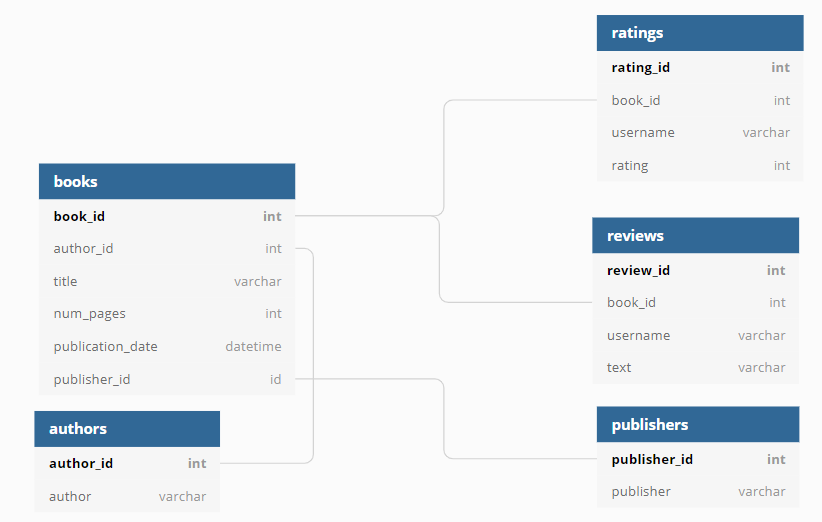

## Description of the data

The `books` table contains data on books:
- book_id (PK)
- author_id
- title
- num_pages — number of pages
- publication_date
- publisher_id

The `authors` table contains data on authors:
- author_id (PK)
- author


The `publishers` table contains data on publishers:
- publisher_id (PK)
- publisher


The `ratings` table contains data on user ratings:
- rating_id (PK)
- book_id
- username — the name of the user who rated the book
- rating

The `reviews` table contains data on customer reviews:
- review_id (PK)
- book_id
- username — the name of the user who reviewed the book
- text — the text of the review

## Importing Libraries

In [1]:
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'practicum_student',         # username
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Studying the Data

In [2]:
import pandas as pd

tables = ['books', 'authors', 'publishers', 'ratings', 'reviews']

for table in tables:
    query = 'SELECT * FROM ' + table + ' LIMIT 5'

    df = pd.io.sql.read_sql(query, con=engine)

    # Displaying the tables
    display(df)

  # Checking for duplicates
    duplicates = df.duplicated()
    if duplicates.any():
        print(f"Duplicates found in the '{table}' table")
        print(df[duplicates])
    else:
        print(f"No duplicate values found in the '{table}' table")

    # Checking for missing values
    missing_values = df.isnull().sum()
    if missing_values.any():
        print(f"Missing values found in the '{table}' table")
        print(missing_values)
    else:
        print(f"No missing values found in the '{table}' table")

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


No duplicate values found in the 'books' table
No missing values found in the 'books' table


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


No duplicate values found in the 'authors' table
No missing values found in the 'authors' table


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


No duplicate values found in the 'publishers' table
No missing values found in the 'publishers' table


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


No duplicate values found in the 'ratings' table
No missing values found in the 'ratings' table


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


No duplicate values found in the 'reviews' table
No missing values found in the 'reviews' table


The SQL tables were loaded and checked for missing or duplicate values, ensuring data integrity.

In [3]:
#creating a function to run sql queries
def execute(query):
    return pd.io.sql.read_sql(query, con = engine)

## Number of books released after January 1, 2000.

In [4]:
query1= '''
SELECT
    (SELECT COUNT(*) FROM books) AS total_book_count,
    COUNT(*) AS book_count_after_date
FROM
    books
WHERE
    publication_date > '2000-01-01';
    '''

execute(query1)

,total_book_count,book_count_after_date
0,1000,819


Among the 1000 books in the dataset, a significant majority of 819 books, accounting for 81.9%, were released after January 1, 2000. This indicates a clear trend towards more recent publications, reflecting the evolving literary landscape and the prevalence of contemporary works. The data showcases a shift in readers' preferences towards newer releases, highlighting the relevance and popularity of books from the 21st century.

## Number of user reviews and the average rating for each book

In [5]:
query2 = '''
    SELECT b.title AS book_title, 
           COUNT(DISTINCT r.review_id) AS reviews_count,
           AVG(ra.rating) AS average_rating
    FROM books b
    LEFT JOIN reviews r ON b.book_id = r.book_id
    LEFT JOIN ratings ra ON b.book_id = ra.book_id
    GROUP BY b.title
    ORDER BY reviews_count DESC, average_rating DESC;
'''

execute(query2)

,book_title,reviews_count,average_rating
0,Memoirs of a Geisha,8,4.138462
1,Twilight (Twilight #1),7,3.662500
2,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
3,Harry Potter and the Chamber of Secrets (Harry...,6,4.287500
4,The Book Thief,6,4.264151
...,...,...,...
994,Disney's Beauty and the Beast (A Little Golden...,0,4.000000
995,Essential Tales and Poems,0,4.000000
996,Leonardo's Notebooks,0,4.000000
997,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667


Analyzing the output, we can observe interesting patterns:

- 'Memoirs of a Geisha' takes the lead with 8 reviews and an average rating of 4.13. It receives positive feedback, reflecting its captivating storytelling.


- 'Twilight (Twilight #1)' follows closely with 7 reviews. However, it receives a relatively lower average rating of around 3.6, implying mixed reader opinions.


- The 'Harry Potter' books, each with 6 reviews, shine with consistently high average ratings surpassing 4.1. This underscores the enduring magic and beloved status of J.K. Rowling's enchanting series.


- 'The Book Thief' also receives 6 reviews and has an average rating of 4.26, further solidifying its reputation as a captivating and highly regarded literary work.

## The publisher that has released the greatest number of books*

*with more than 50 pages. 
this will help you exclude brochures and similar publications from your analysis.

In [6]:
query3 = '''
SELECT p.publisher, COUNT(b.book_id) AS books_count
FROM books b
JOIN publishers p ON b.publisher_id=p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY books_count DESC
LIMIT 1;
'''

execute(query3)

,publisher,books_count
0,Penguin Books,42


In our database, it's the renowned publisher 'Penguin Books' that shines brightly. Thanks to their contributions, we have the pleasure of delving into a diverse collection of 42 captivating books, each spanning more than 50 pages. 'Penguin Books' has consistently delivered literary treasures that engage and inspire readers, making them a true star in the world of publishing.

## The author with the highest average book rating*

*look only at books with at least 50 ratings.

In [7]:
query4 = '''
SELECT a.author, AVG(ra.rating) AS average_rating
FROM books b
JOIN authors a ON b.author_id=a.author_id
JOIN ratings ra ON b.book_id=ra.book_id
GROUP BY a.author
HAVING COUNT(ra.rating) > 50
ORDER BY average_rating DESC
LIMIT 1;
'''
execute(query4)

,author,average_rating
0,J.K. Rowling/Mary GrandPré,4.288462


When it comes to the author with the highest average book rating, the dynamic duo of J.K. Rowling and the talented illustrator Mary GrandPré, the magical team behind the popular Harry Potter series, takes the crown. They have received an incredible average rating of ~4.3 stars, enchanting readers with captivating storytelling and visually stunning illustrations that bring the wizarding world to life.

## Find the average number of text reviews among users* 

*who rated more than 50 books.

In [8]:
query5 = '''
SELECT AVG(review_count) AS average_text_reviews
FROM (
    SELECT r.username, COUNT(r.review_id) AS review_count
    FROM ratings ra
    JOIN reviews r ON ra.book_id = r.book_id AND ra.username = r.username
    WHERE ra.username IN (
        SELECT username
        FROM ratings
        GROUP BY username
        HAVING COUNT(book_id) > 50
    )
    GROUP BY r.username
) AS subquery;
'''
execute(query5)

,average_text_reviews
0,24.333333


The average number of text reviews among users who rated more than 50 books is approximately 24.333333. This suggests that there is a subset of highly engaged users who actively provide detailed feedback and reviews for a significant number of books they have rated. Their extensive involvement indicates a strong passion for reading and a willingness to share their thoughts and experiences with others. This finding emphasizes the importance of cultivating a community of avid readers who contribute valuable insights through their text reviews, enhancing the overall literary discourse and enriching the reading experience for others.

## Conclusion

In this study, we dug into how the coronavirus shook up the book industry by looking at customer ratings, reviews, and other data. Here is what we uncovered:

- Readers are all about the new stuff! Any new product or service should focus on fresh titles to stay in the game.


- Some books, like 'Twilight', got them bookwarms divided. People had mixed feelings about them, so it's crucial to understand reader preferences in more detail. Gathering extra feedback can help us figure out what clicks with readers and incorporate those elements into our new thing.


- You can't deny the magic of 'Harry Potter'. Those books have a dedicated fanbase and consistently high ratings. If we want to create something enchanting, we should tap into that same allure with captivating narratives and a world that draws readers in.


- 'Penguin Books' is a rockstar when it comes to picking captivating titles. They know how to curate a collection that keeps readers hooked. So, we should focus on quality, diversity, and engaging content to make our product or service a hit.


- We've got some super-engaged users in the mix. They write detailed reviews and share their love for books. Let's nurture that passion by building a community where they can connect, discuss, and maybe even personalize recommendations. It'll be like a book-lover's dream hangout!


These insights are the secret sauce for cooking up a new product or service that book enthusiasts will adore.

Let's get creative and make something awesome for the bookworms out there!